In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Missing values per column:
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurren

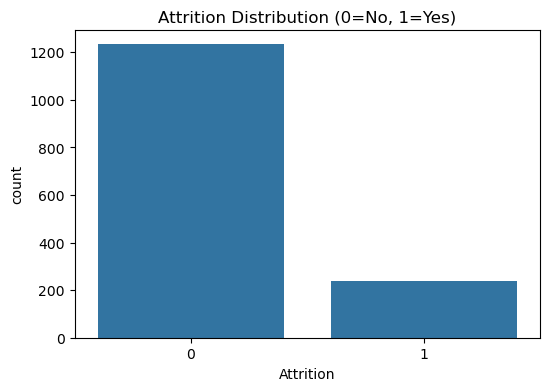

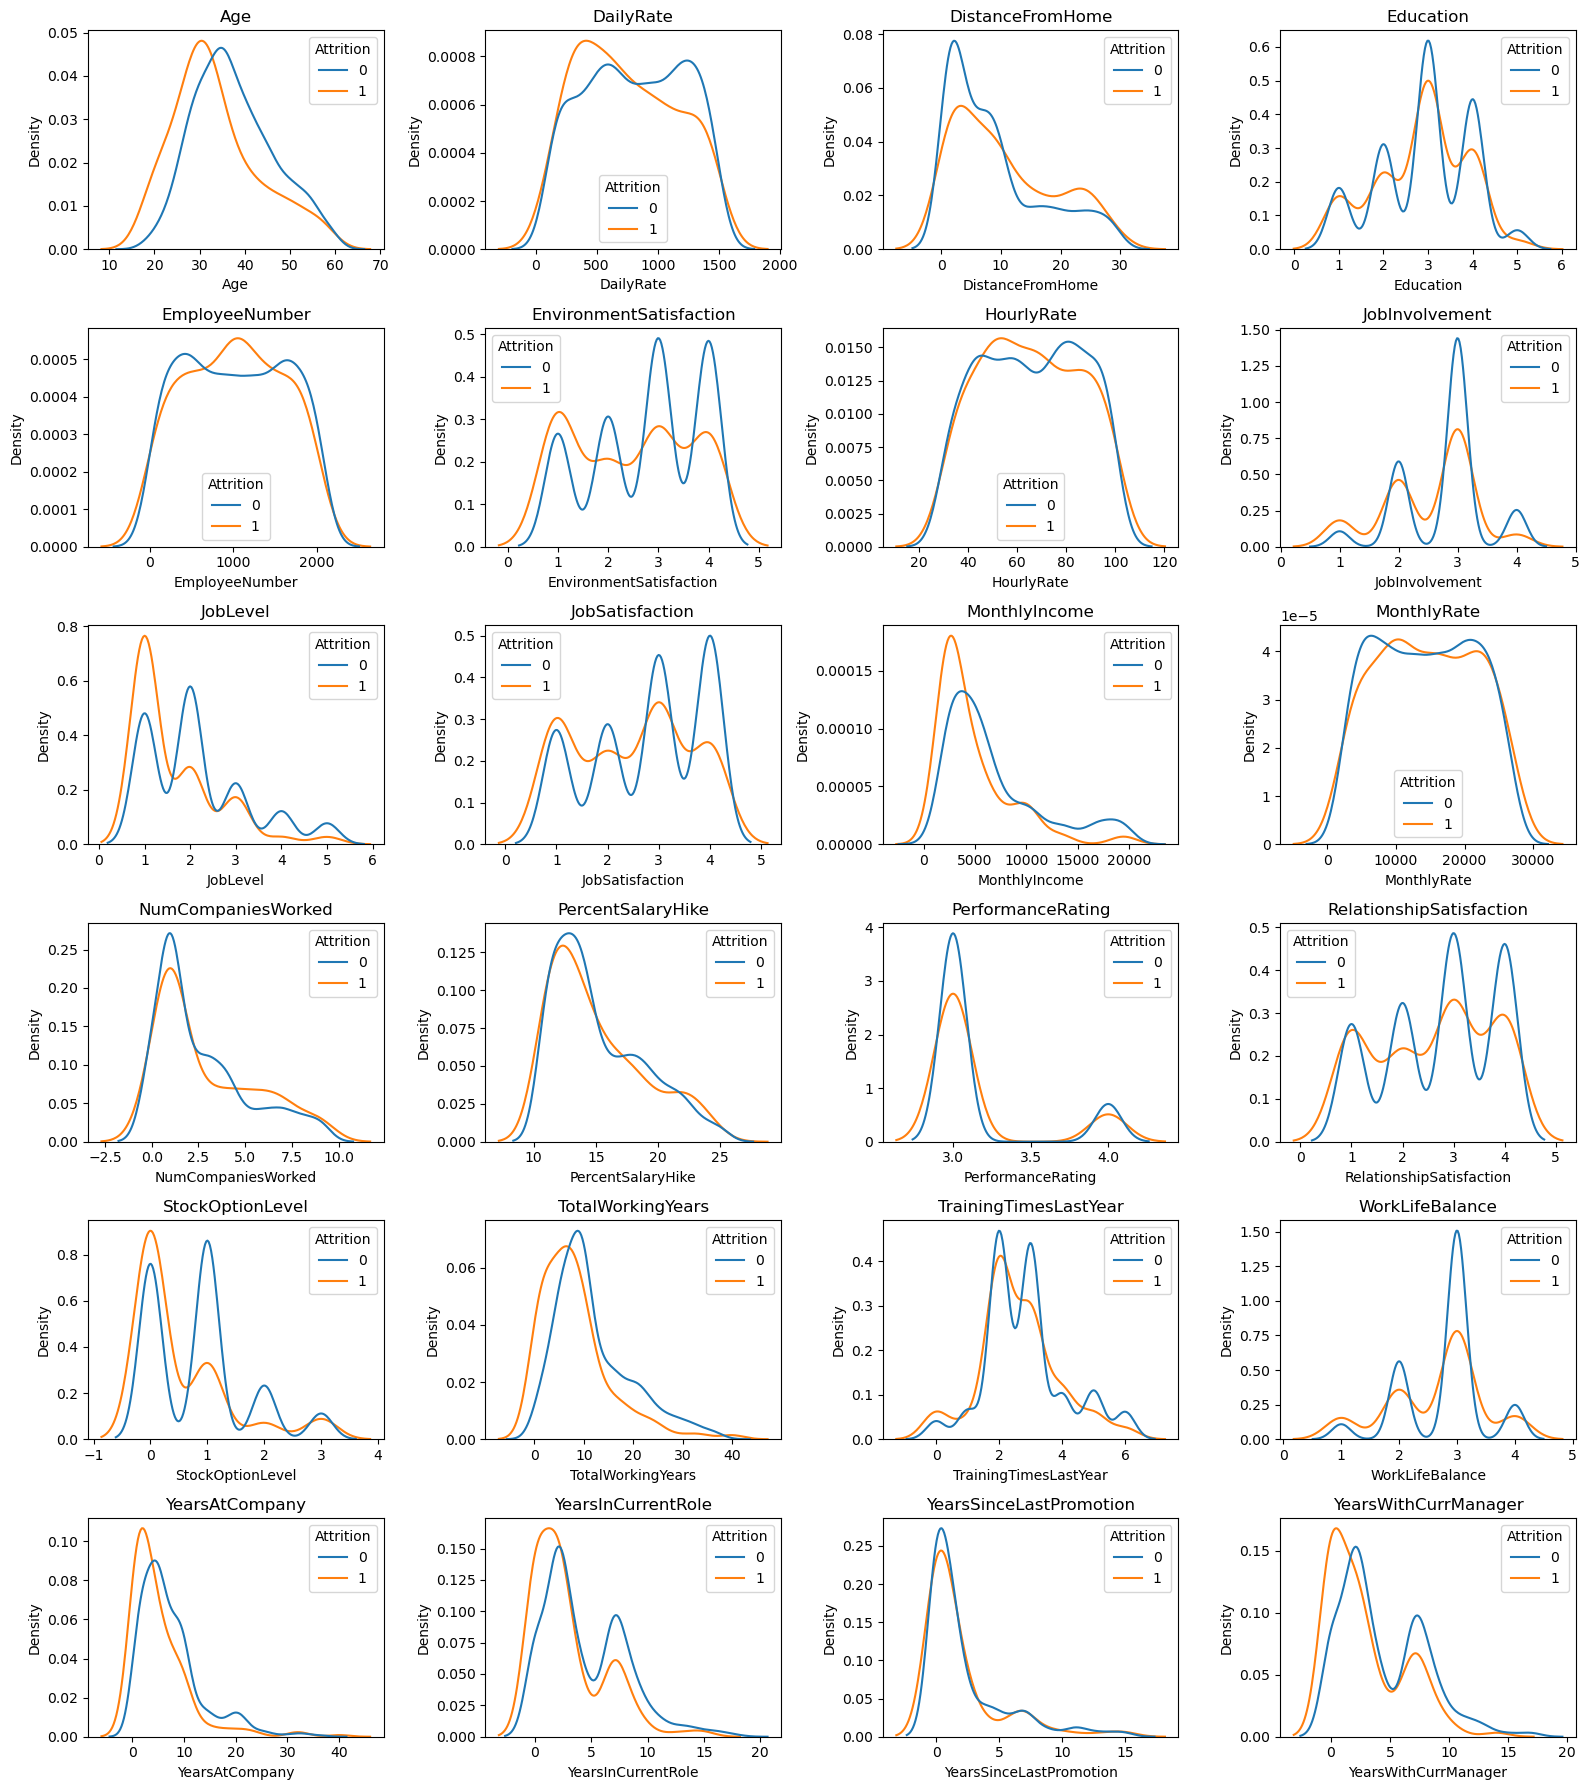

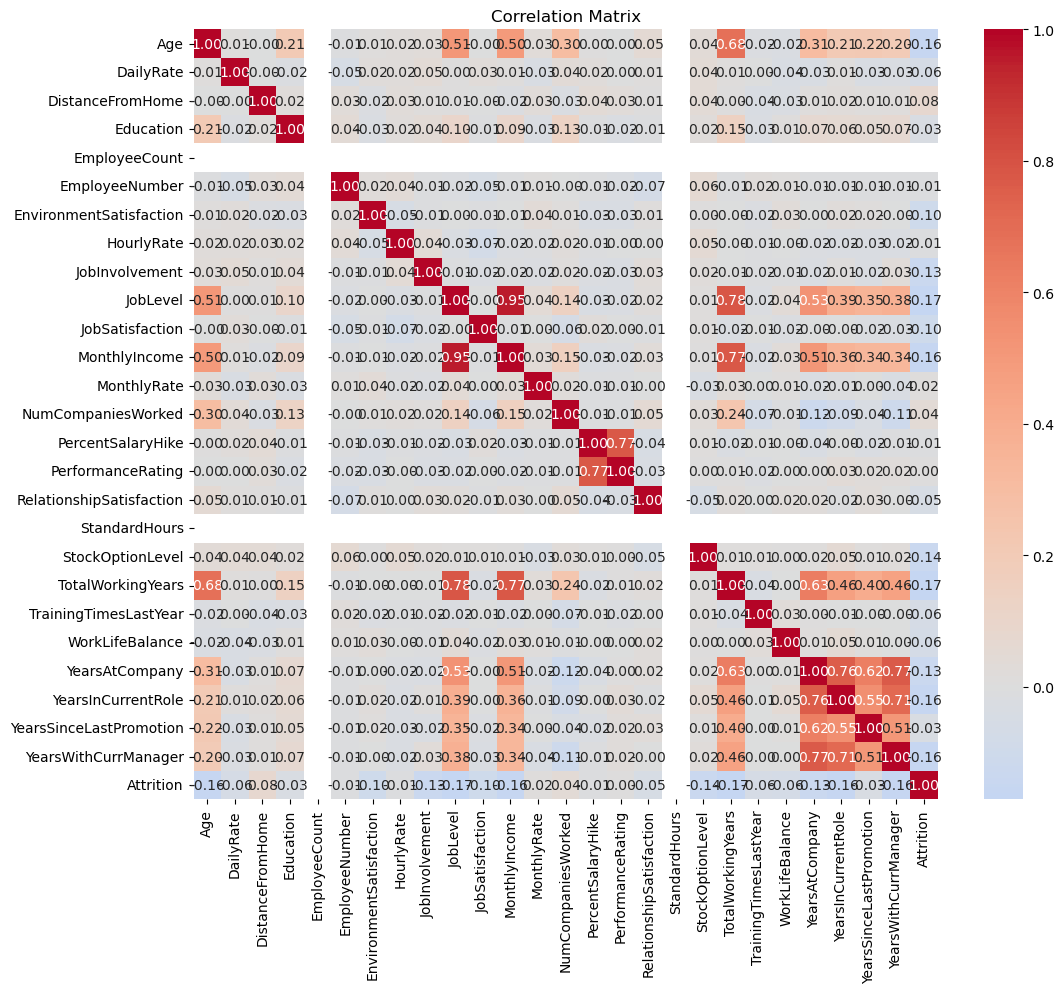

In [142]:

# Load data from local CSV
df = pd.read_csv('Data/WA_Fn-UseC_-HR-Employee-Attrition.csv')

# Clean data
print("Missing values per column:")
print(df.isnull().sum())

df.dropna(inplace=True)

# Convert 'Attrition' to binary
df['Attrition'] = df['Attrition'].map({'Yes':1, 'No':0})

# Convert object columns except 'Attrition' to categorical
for col in df.select_dtypes(include='object').columns:
    if col != 'Attrition':
        df[col] = df[col].astype('category')

print("\nDataset shape:", df.shape)
print("\nSample data:")
print(df.head())

print("\nSummary statistics:")
print(df.describe(include='all').T)

# Plot attrition counts
plt.figure(figsize=(6,4))
sns.countplot(x='Attrition', data=df)
plt.title('Attrition Distribution (0=No, 1=Yes)')
plt.show()

# Numeric columns excluding Attrition
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols.remove('Attrition')

# Filter numeric cols with variance > 0 for KDE plots
numeric_nonconst = [col for col in numeric_cols if df[col].var() > 0]

# KDE plots by attrition
n_plots = len(numeric_nonconst)
n_cols = 4
n_rows = (n_plots + n_cols - 1) // n_cols

plt.figure(figsize=(4*n_cols, 3*n_rows))
for i, col in enumerate(numeric_nonconst):
    plt.subplot(n_rows, n_cols, i+1)
    sns.kdeplot(data=df, x=col, hue='Attrition', common_norm=False, warn_singular=False)
    plt.title(col)
plt.tight_layout()
plt.show()

# Correlation matrix plot
plt.figure(figsize=(12,10))
corr = df[numeric_cols + ['Attrition']].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()


In [143]:

from sklearn.preprocessing import LabelEncoder

# Load data
df = pd.read_csv('Data/WA_Fn-UseC_-HR-Employee-Attrition.csv')

# Drop irrelevant columns
df = df.drop(columns=['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'])

# Convert target to binary
df['Attrition'] = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

# Separate target
y = df['Attrition']

# Select features - exclude target and irrelevant IDs
X = df.drop(columns=['Attrition'])

# Identify categorical columns
cat_cols = X.select_dtypes(include=['object']).columns

# Encode categorical variables with LabelEncoder (for simplicity)
le = LabelEncoder()
for col in cat_cols:
    X[col] = le.fit_transform(X[col])

# Now X is numeric and ready for modeling
print(f"Features shape: {X.shape}")
print(f"Sample data:\n{X.head()}")
print(f"Target distribution:\n{y.value_counts()}")


Features shape: (1470, 30)
Sample data:
   Age  BusinessTravel  DailyRate  Department  DistanceFromHome  Education  \
0   41               2       1102           2                 1          2   
1   49               1        279           1                 8          1   
2   37               2       1373           1                 2          2   
3   33               1       1392           1                 3          4   
4   27               2        591           1                 2          1   

   EducationField  EnvironmentSatisfaction  Gender  HourlyRate  ...  \
0               1                        2       0          94  ...   
1               1                        3       1          61  ...   
2               4                        4       1          92  ...   
3               1                        4       0          56  ...   
4               3                        1       1          40  ...   

   PerformanceRating  RelationshipSatisfaction  StockOptionLevel

In [144]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Load data
df = pd.read_csv('Data/WA_Fn-UseC_-HR-Employee-Attrition.csv')

# Drop irrelevant columns
df = df.drop(columns=['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'])

# We will predict 'MonthlyIncome'
y = df['MonthlyIncome']

# Select features - drop target from features
X = df.drop(columns=['MonthlyIncome'])

# Identify categorical columns
cat_cols = X.select_dtypes(include=['object']).columns

# Encode categorical variables with LabelEncoder
le = LabelEncoder()
for col in cat_cols:
    X[col] = le.fit_transform(X[col])

# Split data into train/test (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict on test set
y_pred = lr.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression Model Performance:")
print(f"R² Score: {r2:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Show sample predictions vs actual
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).reset_index(drop=True)
print(comparison.head(10))


Linear Regression Model Performance:
R² Score: 0.8962
Root Mean Squared Error (RMSE): 1506.09
   Actual     Predicted
0    8463   6047.783986
1    4450   5772.250357
2    1555   2335.784650
3    9724  11342.554791
4    5914   6509.156772
5    2579   1893.678442
6    4230   1909.174480
7    2232   2379.609487
8    8865  10367.876523
9    2269   1894.459817


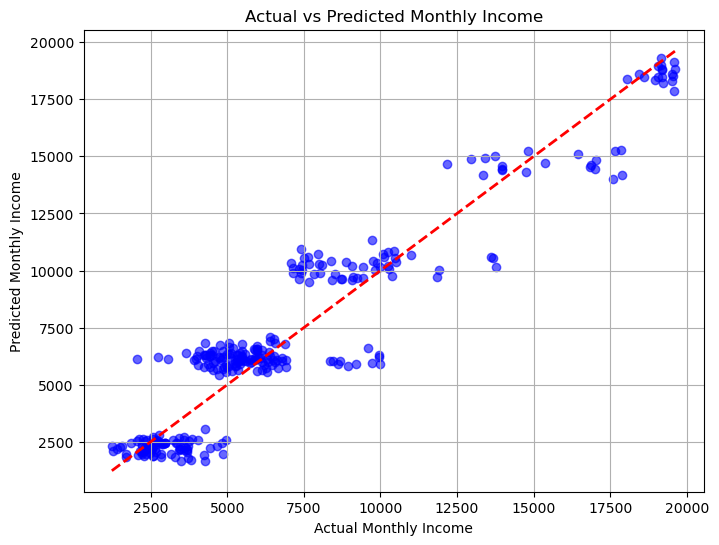

In [145]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6, color='b')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # perfect prediction line
plt.xlabel('Actual Monthly Income')
plt.ylabel('Predicted Monthly Income')
plt.title('Actual vs Predicted Monthly Income')
plt.grid(True)
plt.show()


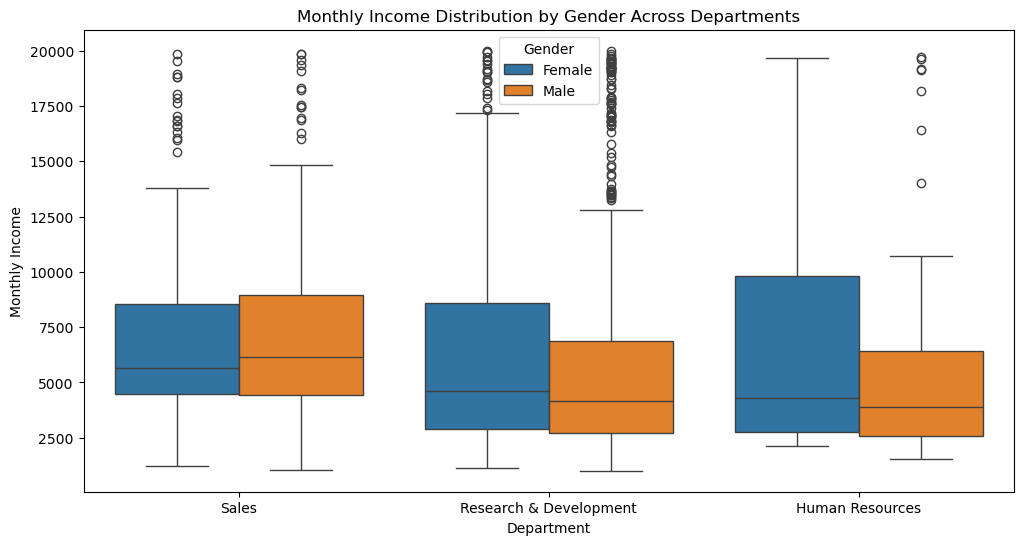

In [146]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Department', y='MonthlyIncome', hue='Gender')
plt.title('Monthly Income Distribution by Gender Across Departments')
plt.xlabel('Department')
plt.ylabel('Monthly Income')
plt.legend(title='Gender')
plt.show()

In [147]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R-squared: {r2:.4f}")


MAE: 1162.95
MSE: 2268297.53
RMSE: 1506.09
R-squared: 0.8962


In [148]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

# Load data
df = pd.read_csv('Data/WA_Fn-UseC_-HR-Employee-Attrition.csv')

# Encode target
df['Attrition'] = df['Attrition'].map({'Yes':1, 'No':0})

# Select features (example set, you can adjust)
features = ['Age', 'DistanceFromHome', 'Education', 'JobLevel', 'MonthlyIncome', 'NumCompaniesWorked', 'TotalWorkingYears', 'YearsAtCompany', 'YearsSinceLastPromotion']

X = df[features]
y = df['Attrition']

# Handle missing or zero variance if any
X = X.fillna(X.mean())

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

# Train Logistic Regression
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:,1]

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))

print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8390022675736961
Precision: 0.5
Recall: 0.014084507042253521
F1 Score: 0.0273972602739726
ROC AUC: 0.6656261895698515

Classification Report:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91       370
           1       0.50      0.01      0.03        71

    accuracy                           0.84       441
   macro avg       0.67      0.51      0.47       441
weighted avg       0.79      0.84      0.77       441



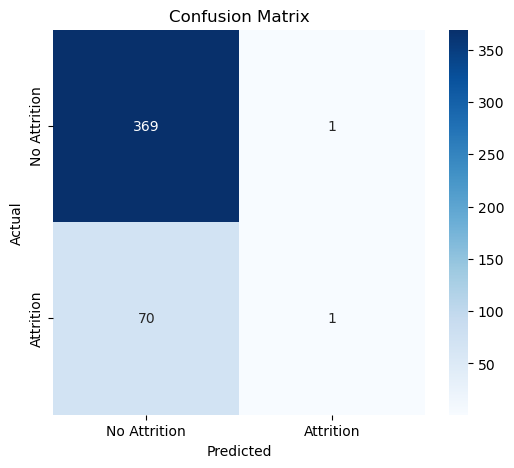

In [149]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


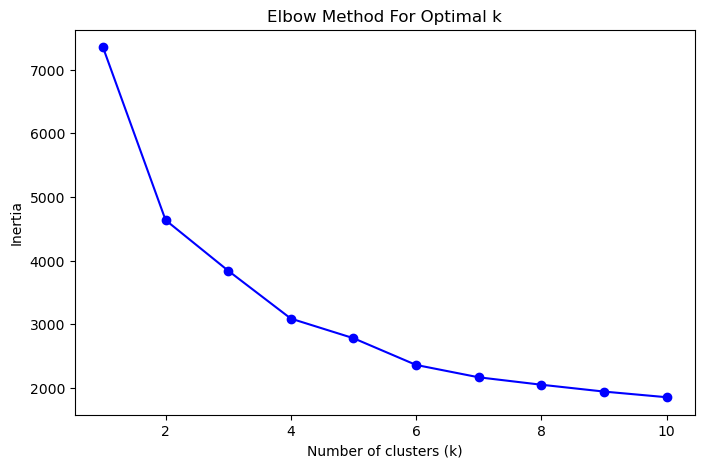

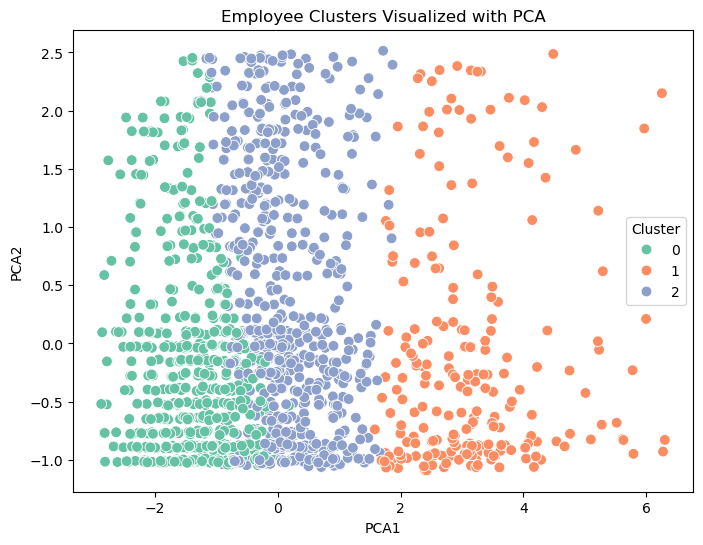

In [150]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Select numeric features for clustering
numeric_cols = ['Age', 'MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany', 'DistanceFromHome']
df_features = df[numeric_cols].copy()

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_features)

# Elbow method to determine optimal k
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

# Choose number of clusters (e.g., k=3)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to df_features
df_features['Cluster'] = clusters

# PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df_features['PCA1'] = X_pca[:, 0]
df_features['PCA2'] = X_pca[:, 1]

plt.figure(figsize=(8,6))
sns.scatterplot(data=df_features, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', s=60)
plt.title('Employee Clusters Visualized with PCA')
plt.show()


In [151]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Assume X_scaled contains your scaled features for clustering

range_n_clusters = range(2, 11)  # Try clusters from 2 to 10
best_score = -1
best_k = None

for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, cluster_labels)
    print(f"Number of clusters: {k}, Silhouette Score: {score:.3f}")
    if score > best_score:
        best_score = score
        best_k = k

print(f"\nRecommended number of clusters: {best_k} with Silhouette Score: {best_score:.3f}")


Number of clusters: 2, Silhouette Score: 0.438
Number of clusters: 3, Silhouette Score: 0.225
Number of clusters: 4, Silhouette Score: 0.257
Number of clusters: 5, Silhouette Score: 0.257
Number of clusters: 6, Silhouette Score: 0.274
Number of clusters: 7, Silhouette Score: 0.268
Number of clusters: 8, Silhouette Score: 0.219
Number of clusters: 9, Silhouette Score: 0.214
Number of clusters: 10, Silhouette Score: 0.221

Recommended number of clusters: 2 with Silhouette Score: 0.438


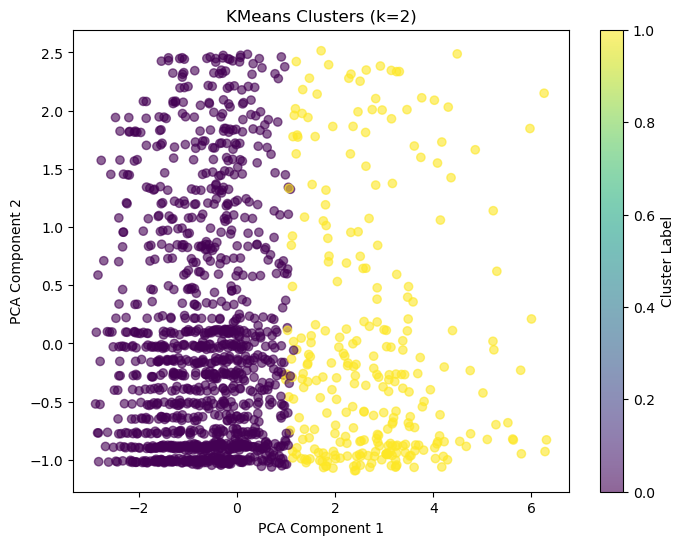

In [152]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Fit KMeans with the best number of clusters
kmeans_optimal = KMeans(n_clusters=best_k, random_state=42)
cluster_labels_optimal = kmeans_optimal.fit_predict(X_scaled)

# Optional: Reduce to 2D for visualization using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=cluster_labels_optimal, cmap='viridis', alpha=0.6)
plt.title(f'KMeans Clusters (k={best_k})')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(scatter, label='Cluster Label')
plt.show()


In [153]:
import joblib

# Assuming your trained models are named:
# lin_reg, clf, kmeans_optimal

joblib.dump(lr, 'Models/linear_regression_income.pkl')
joblib.dump(clf, 'Models/attrition_classifier.pkl')
joblib.dump(kmeans_optimal, 'Models/kmeans_clustering.pkl')

print("Models saved successfully!")


Models saved successfully!
